# Weight Prediction with the help of Gender and Height

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.simplefilter("ignore")

In [2]:
dataset = pd.read_csv("weight-height.csv")

In [3]:
dataset.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
dataset.shape

(10000, 3)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [6]:
dataset.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [7]:
dataset.count()

Gender    10000
Height    10000
Weight    10000
dtype: int64

In [8]:
dataset.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [9]:
dataset["Gender"] = LabelEncoder().fit_transform(dataset["Gender"])

In [10]:
dataset.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


<AxesSubplot:xlabel='Gender', ylabel='count'>

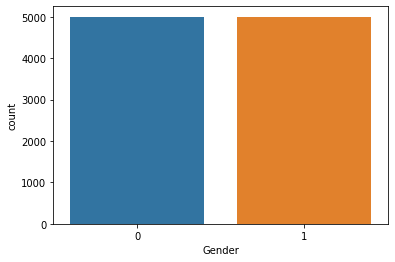

In [11]:
sns.countplot(x="Gender",data=dataset)

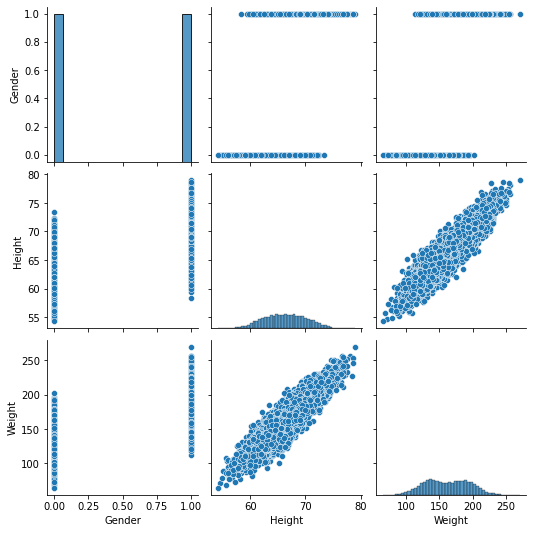

In [12]:
sns.pairplot(dataset)

In [13]:
dataset.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [14]:
X = dataset.drop(columns="Weight",axis=1)
Y = dataset["Weight"]

In [15]:
X.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [17]:
X_train.head()

,Gender,Height
2967,1,68.058837
700,1,69.760095
3481,1,71.702360
1621,1,71.096113
800,1,72.215035


In [18]:
X_test.head()

,Gender,Height
9394,0,64.723877
898,1,67.272171
2398,1,74.520972
5906,0,65.880014
2343,1,64.846301


In [19]:
Y_train.head()

2967    187.779075
700     187.812062
3481    214.787698
1621    210.821194
800     204.937760
Name: Weight, dtype: float64

In [20]:
Y_test.head()

9394    138.085796
898     187.363366
2398    216.533191
5906    131.761443
2343    157.718438
Name: Weight, dtype: float64

In [21]:
X.shape,X_test.shape,X_train.shape

((10000, 2), (2500, 2), (7500, 2))

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train,Y_train)

LinearRegression()

In [24]:
prediction = model.predict(X_test)

In [25]:
score = r2_score(prediction,Y_test)

In [26]:
score

0.8905030905575755

In [27]:
new_data = [[0,74]]
weight = model.predict(new_data)
weight
print(weight*0.45)

[88.77203159]
